In [ ]:
题目1：一阶线性微分方程
方程：
y′+2y=3x+1
初始条件：
y(0)=0

In [5]:
import sympy as sp
x=sp.var('x')
y=sp.Function('y')

fun=y(x).diff(x,1)+2*y(x)-3*x-1
ics={
    y(x).subs(x,0):0
}

s=sp.dsolve(fun,y(x),ics=ics)
s

Eq(y(x), 3*x/2 - 1/4 + exp(-2*x)/4)

In [ ]:
题目2：常系数二阶线性微分方程
方程：

y′′−4𝑦′+4y=e^(2x)

初始条件：
y(0)=1,y′(0)=0

In [9]:
x=sp.var('x')
y=sp.Function('y')
fun=y(x).diff(x,2)-4*y(x).diff(x,1)+4*y(x)-sp.exp(2*x)
ics={
    y(x).diff(x,1).subs(x,0):0,
    y(x).subs(x,0):1
}
s=sp.dsolve(fun,y(x),ics=ics)
s

Eq(y(x), (x*(x/2 - 2) + 1)*exp(2*x))

In [ ]:
题目3：非线性微分方程（变系数）
方程：

y′=y^2-x^2
 
初始条件：

y(0)=1

In [67]:
x=sp.var('x')
y=sp.Function('y')
fun=y(x).diff(x,1)-y(x)**2+x**2
ics={
    y(x).subs(x,0):1
}
s=sp.dsolve(fun,y(x),ics=ics)


TypeError: bad operand type for unary -: 'list'

In [ ]:
题目4：齐次线性微分方程组
方程组：
dx/dt=3x+4y
dy/dt=−4x+3y

初始条件：

x(0)=1,y(0)=0

In [72]:
from IPython.display import display, Math  # 用于 LaTeX 渲染输出
t=sp.var('t')
x,y=sp.var('x,y',cls=sp.Function)
fun=[x(t).diff(t,1)-3*x(t)-4*y(t),
    y(t).diff(t,1)+4*x(t)-3*y(t)]
ics={
    x(t).subs(t,0):1,
    y(t).subs(t,0):0
}
s=sp.dsolve(fun,[x(t),y(t)],ics=ics)
for sol in s:
    display(Math(sp.latex(sol)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
题目5：常系数三阶线性微分方程
方程：

y′′′-6y′′+y′-6y=0

初始条件：
y(0)=1,y′(0)=0,y′′(0)=0

In [74]:
x=sp.var('x')
y=sp.Function('y')
fun=y(x).diff(x,3)-6*y(x).diff(x,2)+y(x).diff(x,1)-6*y(x)
ics={
    y(x).subs(x,0):1,
    y(x).diff(x,1).subs(x,0):0,
    y(x).diff(x,2).subs(x,0):0
}

s=sp.dsolve(fun,y(x),ics=ics)
s


Eq(y(x), exp(6*x)/37 - 6*sin(x)/37 + 36*cos(x)/37)

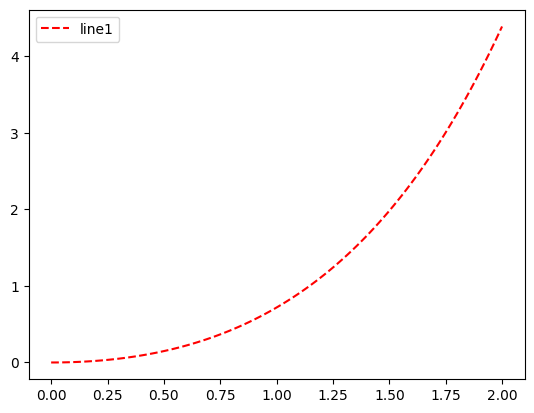

In [80]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt 
def fun(y,x):
    return x+y
x=np.linspace(0,2,100)
s=odeint(fun,0,x)
plt.plot(x,s,'--r',label='line1')
plt.legend()

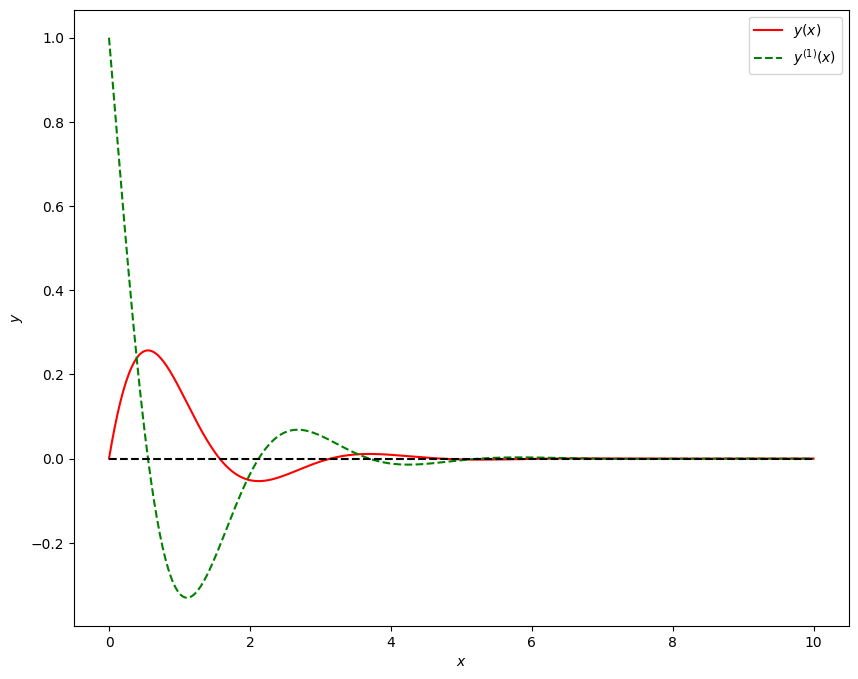

In [100]:
x=np.linspace(0,10,500)
def fun(y,x):
    return [y[1],-2*y[1]-5*y[0]]
s=odeint(fun,[0,1],x)
plt.figure(figsize=(10,8))
plt.plot(x,s[:,0],'-r',label='$y(x)$')
plt.plot(x,s[:,1],'--g',label='$y^{(1)}(x)$')
plt.plot([0,10],[0,0],'--k')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

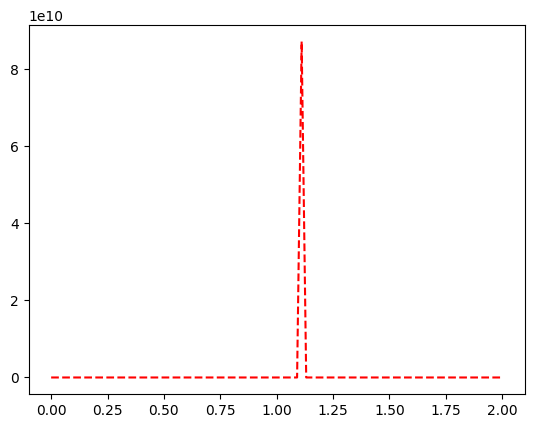

In [103]:
x=np.linspace(0,2,100)
def fun(y,x):
    return y**2-x
s=odeint(fun,1,x)
plt.plot(x,s,'--r')

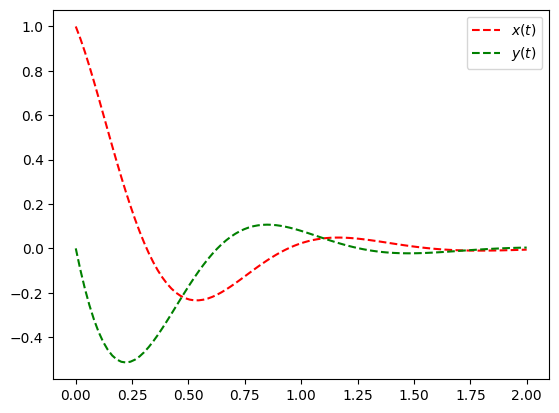

In [107]:
t=np.linspace(0,5,100)
def fun(y,t):
    return[-y[0]+2*y[1],-2*y[0]-y[1]]
s=odeint(fun,[1,0],t)
plt.plot(x,s[:,0],'--r',label='$x(t)$')
plt.plot(x,s[:,1],'--g',label='$y(t)$')
plt.legend()

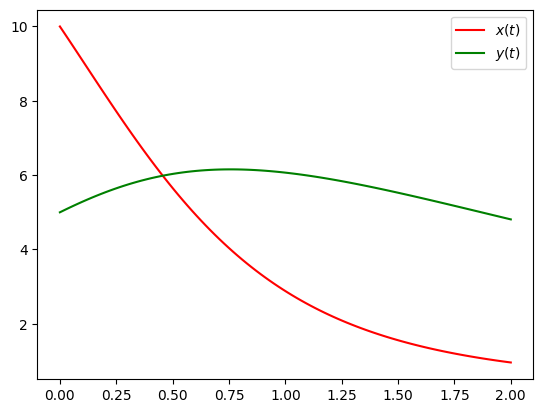

In [118]:
t=np.linspace(0,30,500)
a=1.1;b=0.4;c=0.1;d=0.4
def fun(y,t,a,b,c,d):
    return [a*y[0]-b*y[0]*y[1],c*y[0]*y[1]-d*y[1]]
s=odeint(fun,[10,5],x,args=(a,b,c,d))
plt.plot(x,s[:,0],'-r',label='$x(t)$')
plt.plot(x,s[:,1],'-g',label='$y(t)$')
plt.legend()

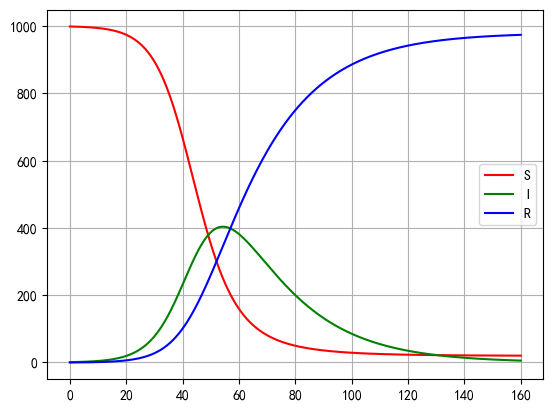

In [167]:
from scipy.integrate import odeint
import sympy as sp
import matplotlib.pylab as plt
import numpy as np

t=np.linspace(0,160,1000)
def fun(y,t,b,c,n):
    return[-b*y[0]*y[1]/n,b*y[0]*y[1]/n-c*y[1],c*y[1]]
b=0.2;c=0.05;n=1000
s=odeint(fun,[999,1,0],t,args=(b,c,n))
plt.plot(t,s[:,0],'-r',label='S')
plt.plot(t,s[:,1],'-g',label='I')
plt.plot(t,s[:,2],'-b',label='R')
plt.grid()
plt.legend()
plt.savefig('demo')

In [ ]:
🧬 SEIR 模型简介：
SEIR 模型考虑了病毒的潜伏期，即被感染者不会立刻具有传染性：

S(t)：易感者

E(t)：潜伏者（已感染，尚未具有传染性）

I(t)：感染者（具有传染性）

R(t)：康复者（或死亡者，表示不再传播）

dS/dt=−βSI/n
dE/dt=βSI/n−σE
dI/dt=σE−γI
dR/dt=γI
​
β：传播率（如 0.3）
σ：潜伏转为感染的速率（如 1/5 表示平均5天潜伏）
γ：康复率（如 1/10 表示平均10天康复）
n: 总人数 10000


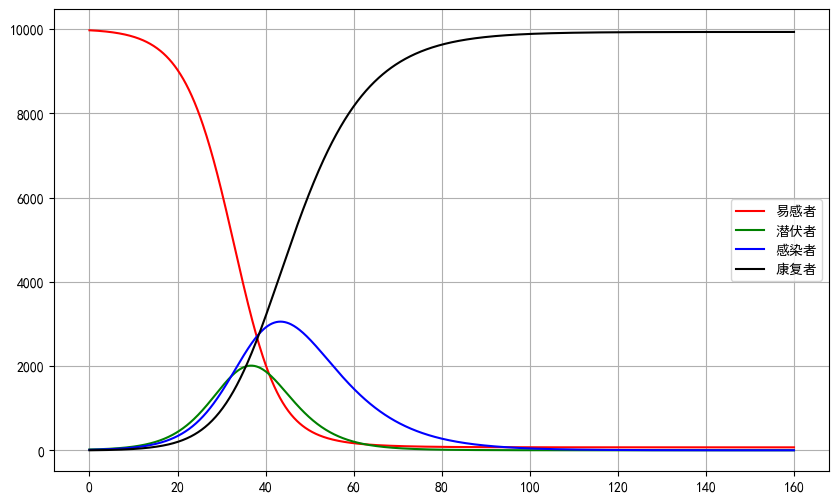

In [165]:
plt.rcParams['font.sans-serif'] = ['SimHei']      # 黑体
plt.rcParams['axes.unicode_minus'] = False        # 正确显示负号
t=np.linspace(0,160,1000)
def fun(y,t,b,c,d,n):
    return [-b*y[0]*y[2]/n,b*y[0]*y[2]/n-c*y[1],c*y[1]-d*y[2],d*y[2]]
b=0.5;c=0.2;d=0.1;n=10000
s=odeint(fun,[9970,20,10,0],t,args=(b,c,d,n))
plt.figure(figsize=(10,6))
plt.plot(t,s[:,0],'-r',label='易感者')
plt.plot(t,s[:,1],'-g',label='潜伏者')
plt.plot(t,s[:,2],'-b',label='感染者')
plt.plot(t,s[:,3],'-k',label='康复者')
plt.grid()
plt.legend()